In [1]:
import pandas

df_train = pandas.read_csv("../data/train_data_stg.csv", delimiter="|")
df_test = pandas.read_csv("../data/test_data_stg.csv", delimiter="|")

In [2]:
df_train = df_train.drop(['rank'],axis = 1)
df_test = df_test.drop(['rank'] ,axis = 1)

In [4]:
import numpy as np
df_train['t'] = np.log(df_train['t'])
df_train['p'] = np.log(df_train['p'])

df_test['t'] = np.log(df_test['t'])
df_test['p'] = np.log(df_test['p'])

In [5]:
import xgboost as xgb

dtrain_reg = xgb.DMatrix(df_train['t'], df_train['p'])
dtest_reg = xgb.DMatrix(df_test['t'], df_test['p'])

In [6]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
xgb_mod = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=100
)

prediction = xgb_mod.predict(dtest_reg)

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(df_test[['p']], prediction))
print("Root Mean Squarred Error (RMSE): %.2f" % root_mean_squared_error(df_test[['p']], prediction))
print("R2 Score %.2f" % r2_score(df_test[['p']], prediction))

Mean Absolute Error (MAE): 1.18
Root Mean Squarred Error (RMSE): 1.53
R2 Score 0.42


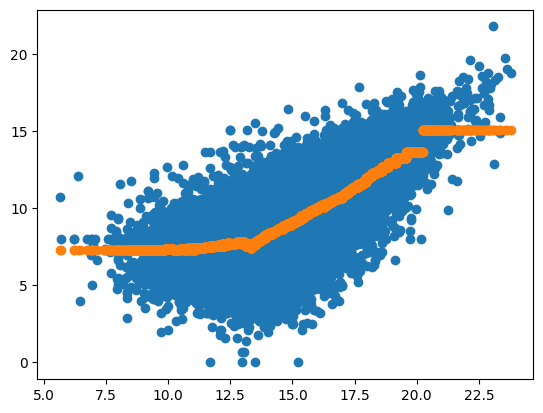

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df_test['t'], df_test['p'])
plt.scatter(df_test['t'], prediction)
plt.show()